In [1]:
import ipyvolume as ipv

In [2]:
ipv.figure()
quiver = ipv.quiver?

In [205]:
import sys
sys.path.append("/ll1701/kristian/analysis/analyze_bubblepaper")
import os
import matplotlib.pyplot as plt
try:
	import gadget
except:
	print('couldnt import gadget!')
import numpy as np
import Param as param
import FigureMove as Fig
import auxiliary_functions as aux
import importlib
importlib.reload(aux)
importlib.reload(Fig)

<module 'FigureMove' from '/ll1701/kristian/analysis/analyze_bubblepaper/FigureMove.py'>

In [167]:
snapNum = 512
axes = [1,0]

In [168]:
folder = '//lustre/kristian/CoolRuns/M14_5/02_cooling_tng_Alpha1/output/'
snap = Fig.quickImport(snapNum, folder=folder)
snapName = r'jet $\delta=90,\ \alpha=1$ at %g Myr' %aux.get_Time(snap)
print('looking at %s'%snapName)
print(snap.boxsize, snap.center)

folder,snapbase,time
//lustre/kristian/CoolRuns/M14_5/02_cooling_tng_Alpha1/output/ snap_ 512
folder, time //lustre/kristian/CoolRuns/M14_5/02_cooling_tng_Alpha1/output/ 512
//lustre/kristian/CoolRuns/M14_5/02_cooling_tng_Alpha1/output//snap_512.hdf5
Found snap with time (code): 2.55678
generalInfo time:
2501.7 Myr
looking at jet $\delta=90,\ \alpha=1$ at 2501.71 Myr
600.0 [300. 300. 300.]


('data', array([1.4338287, 1.4605134, 1.4597793, ..., 1.3042325, 1.305506 ,
       1.264118 ], dtype=float32))
('data', ':min', 0.005872485)
('data', ':max', 2.3783581)
('data', ':average', 1.562396)
('data', ':mean', 1.562396)
('data', ':shape', (241091,))
Selected 25297 of 241572 particles.


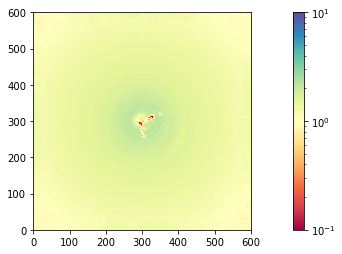

In [169]:
vrange = [1e-1,1e1]
snap.data['tkev'] = aux.get_Temperature_inkV(snap)
aux.printDebug(snap.tkev)
snap.plot_Aslice('tkev', colorbar=1, logplot=1, cmap='Spectral', axes=axes, vrange=vrange)#, vrange=[1e-4,1])
circle = plt.Circle((300, 300), 5.5, color='b', clip_on=False, fill=False)
ax = plt.gca()
# ax.add_artist(circle)

considering_h in ElectronNumberDensity False
('data', array([0.00402425, 0.00446811, 0.00446594, ..., 0.00234758, 0.00235137,
       0.00208512]))
('data', ':min', 0.00014810637072592376)
('data', ':max', 4.749157614432499)
('data', ':average', 0.013042926455103751)
('data', ':mean', 0.013042926455103751)
('data', ':shape', (241091,))
Selected 10856 of 241572 particles.


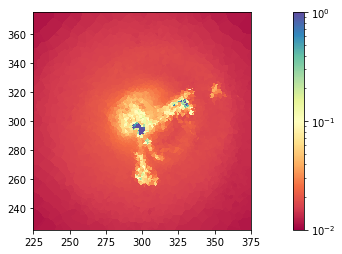

In [170]:
vrange = [1e-2,1e0]
snap.data['nE'] = aux.get_ElectronNumberDensity(snap)
aux.printDebug(snap.nE)
snap.plot_Aslice('nE', colorbar=1, logplot=1, cmap='Spectral', axes=axes, vrange=vrange, box=[150,150])#, vrange=[1e-4,1])
circle = plt.Circle((300, 300), 5.5, color='b', clip_on=False, fill=False)
ax = plt.gca()
# ax.add_artist(circle)

In [171]:
snap.data['x'] = snap.data['pos'][:,0]
snap.data['y'] = snap.data['pos'][:,1]
snap.data['z'] = snap.data['pos'][:,2]
snap.data['vx'] = snap.data['vel'][:,0]
snap.data['vy'] = snap.data['vel'][:,1]
snap.data['vz'] = snap.data['vel'][:,2]

In [172]:
N=40

In [173]:
ipv.figure()
quiver = ipv.quiver(snap.x[::N],  snap.y[::N],  snap.z[::N],
                    snap.vx[::N], snap.vy[::N], snap.vz[::N], color='grey',
                    size=3, size_selected=5, color_selected='red')
# ipv.xyzlim(-30, 30)
ipv.show()

In [174]:
# import pandas as pd
import matplotlib.cm
import numpy as np
import ipyvolume as ipv
import ipywidgets as widgets

In [175]:
import matplotlib

cmap = matplotlib.cm.get_cmap('Spectral')

N = 20


In [176]:
v = aux.get_Temperature_inkV(snap)[::N]#[snap.type==0]
v = np.log10(v)
v = (v-np.min(v))/(np.max(v)-np.min(v))
c = cmap(v)
np.min(c),np.max(c)

(0.00392156862745098, 1.0)

In [177]:
aux.printDebug(aux.get_Temperature_inkV(snap))

('data', array([1.4338287, 1.4605134, 1.4597793, ..., 1.3042325, 1.305506 ,
       1.264118 ], dtype=float32))
('data', ':min', 0.005872485)
('data', ':max', 2.3783581)
('data', ':average', 1.562396)
('data', ':mean', 1.562396)
('data', ':shape', (241091,))


In [178]:
select = aux.get_Temperature_inkV(snap)[::N] < 1e0

In [179]:
x, y, z = np.transpose(snap.pos[snap.type==0][::N])

In [180]:
x1, y1, z1 = np.transpose(snap.pos[snap.type==4])
s1 = snap.mass[snap.type==4]/np.max(snap.mass[snap.type==4])*3

In [231]:
grid = Fig.getAgrid(snap, 'nE', res=1024, ProjBox=snap.boxsize, center=snap.center)

[300. 300. 300.]
[1024 1024 1024]
[600. 600. 600.]
Selected 241091 of 241572 particles.


In [210]:
extent = [[0,snap.boxsize], [0,snap.boxsize], [0,snap.boxsize]]

In [211]:
importlib.reload(ipv)

<module 'ipyvolume' from '/home/kristian/miniconda2/envs/ipyVol/lib/python3.7/site-packages/ipyvolume/__init__.py'>

In [233]:
fig = ipv.figure()
N = 4
f = ipv.scatter(x1, y1, z1, marker='diamond', size=s1, color='red')
s = ipv.scatter(x, y, z, marker='diamond', size=0.2, color=c)
ipv.squarelim()
m = ipv.plot_isosurface(grid, level=1e-1, extent=extent, controls=0)
# ipv.xyzlim(200, 300)

# widget_size = widgets.FloatSlider(min=0.01, max=0.1, step=0.01)
# widget_color = widgets.ColorPicker()
# widgets.jslink((s, 'size'), (widget_size, 'value'))
# widgets.jslink((s, 'color'), (widget_color, 'value'))
# widgets.VBox([widget_size, widget_color])
# s.size = 0.8
s.size_selected = 1
# s.color = 'green'
s.color_selected = 'grey'
s.selected = np.where(select)#np.random.randint(0, 1000, 100)
s.geo = 'circle_2d'
ipv.show()

In [209]:
ipv.scatter?

In [232]:
fig = ipv.figure()
m = ipv.plot_isosurface(grid, level=1e-1, extent=extent, controls=0)
# widget_size = widgets.FloatSlider(min=0.01, max=2, step=0.01)
# widgets.jslink((s, 'size'), (widget_size, 'value'))
# widgets.VBox([widget_size])
ipv.show()

In [201]:
import numpy as np
import ipyvolume as ipv

t = np.linspace(0, 1, 21)
x, y, z = np.meshgrid(t,t,t)
f = x**2 - y + np.sin(2*np.pi*z)
print(np.shape(f))
ipv.figure()
ipv.volshow(f.T)
ipv.plot_isosurface(f, color='gray', [''])
ipv.show()

(21, 21, 21)


In [217]:
ipv.plot_isosurface?